# Chemistry Assigment

The aim of the assignment is to validate the published densities’
data of elements in the periodic table by using cross checking them with atomic data.
Specifically, you are required to write a program that reads the atomic size of each element and its atomic weight,
calculate the **density of a single atom** (atomic weight/ atomic volume)
and compare the results with the tabulated density of the element (see second link).
Note that each element has a theoretical and an empirical size: Your calculation should be based on both.

You are further, required to calculate the distances between the atoms of a given element
that would result in an accurate estimation of the tabulated densities.
The results that you obtain should be compared with the published data
for number of atoms per unit volume (see the second link).

For those of you who want to learn more, you can attempt to visualise your results in a meaningful way.


Note: you are encouraged to work in groups but the submission is individual.


Atomic radii data:
https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)

Density data with number of atoms per volume:
https://en.wikipedia.org/wiki/Talk%3AList_of_elements_by_density/Numeric_densities

In [1]:
AVOGADRO = 6.022e23
AVOGADRO_INV = 1.66054e-24

## Reading radii and other data:

In [2]:
import csv
import periodictable
import math
import numpy as np
import matplotlib.pyplot as plot
elements = {}
# Using DictReader and manipulating the file's header names
with open('radii.csv') as file:
    reader = csv.DictReader(file)
    count = 0
    for row in reader:
        count += 1
        #print(row)
        #if not 'no data' in [row['empirical'], row['calculated']]:
        s = row['symbol']
        if s in elements:
            print(s)
        element = {
            'number': int(row['number']),
            'symbol': s,
            'name': row['name'],
            'empirical_radius': int(row['empirical']) if 'no data' != row['empirical'] else None,
            'calculated_radius': int(row['calculated']) if 'no data' != row['calculated'] else None
        }
        element['mass'] = periodictable.elements[element['number']].mass
        elements[s] = element
        if not element['empirical_radius'] and not element['calculated_radius']:
            print(s, 'has missing data')

Fr has missing data


## Reading density and count

In [3]:
with open('density.csv') as file:
    skipped = []
    reader = csv.DictReader(file)
    for row in reader:
        s = row['symbol']
        if s not in elements:
            skipped.append(s)
            continue
        elements[s]['known_density'] = float(row['density'].split()[0])
        elements[s]['known_count'] = float(row['number of atoms per volume unit'].split()[0])
    print('Skipped', ', '.join(skipped))

Skipped Uuh, Uup, Lr, Uuq, Uut, Es, Cm, Uub, Bk, Cf, Rf, Rg, Ds, Sg, Mt, Bh, Db, Hs


## Calculating atomic density

$\text{atomic volume} = \frac{4\pi r^3}{3} \left[\text p \text m^3\right]$  
$\text{atomic density} = \frac{\text{atomic mass}}{\text{atomic volume}} = \frac{3m}{4\pi r^3} \left[\text{g} / \text{mol} \cdot \text{pm}^3\right]$

It would be rather futile to compare these values to the tabulated densities, since the assumptions and units are vastly different. See the next section.

In [4]:
atomic_volume = lambda r: 4*math.pi*r**3 / 3
atomic_density = lambda m, r: 3*m / (4*math.pi*r**3)

In [5]:
hydrogen = elements['H']
m, r = hydrogen['mass'], hydrogen['calculated_radius']
print(m, r)
print(atomic_volume(r))
print(atomic_density(m, r))

1.00794 53
623614.5193179835
1.6162869349198836e-06


In [6]:
for _, element in elements.items():
    d, c = element['known_density'], element['known_count']
    print(element['symbol'], '(' + element['name'] + ')', 'which has density',  d, 'and amount', c)
    
    if element.get('empirical_radius'):
        element['empirical_atomic_density'] = atomic_density(element['mass'], element['empirical_radius'])
        print('empirical:', element['empirical_atomic_density'],  end=' - ')
        print('compared:', str(d / element['empirical_atomic_density']), 'vs', c)
        
    if element.get('calculated_radius'):
        element['calculated_atomic_density'] = atomic_density(element['mass'], element['calculated_radius'])
        print('calculated:', element['calculated_atomic_density'], end=' - ')
        print('compared:', str(d / element['calculated_atomic_density']), 'vs', c)
        
    print()

H (hydrogen) which has density 8.988e-05 and amount 0.054
empirical: 1.540018880064432e-05 - compared: 5.8362920846944135 vs 0.054
calculated: 1.6162869349198836e-06 - compared: 55.60893802835521 vs 0.054

He (helium) which has density 0.0001785 and amount 0.027
empirical: 5.529808103554745e-07 - compared: 322.7960114660294 vs 0.027
calculated: 3.207515156571649e-05 - compared: 5.565055542583614 vs 0.027

Li (lithium) which has density 0.534 and amount 46.331
empirical: 5.435373947275471e-07 - compared: 982453.1029142388 vs 46.331
calculated: 3.5578204056613407e-07 - compared: 1500918.9310125904 vs 46.331

Be (beryllium) which has density 1.85 and amount 123.621
empirical: 1.8585465673389094e-06 - compared: 995401.4779671911 vs 123.621
calculated: 1.531395181828325e-06 - compared: 1208048.727038108 vs 123.621

B (boron) which has density 2.34 and amount 18.144
empirical: 4.202623463708073e-06 - compared: 556795.0638945329 vs 18.144
calculated: 3.9193992049386575e-06 - compared: 597030.

calculated: 5.732617825336066e-06 - compared: 1831798.3720438217 vs 58.626

Cd (cadmium) which has density 8.69 and amount 46.555
empirical: 7.206511889323506e-06 - compared: 1205853.8351784712 vs 46.555
calculated: 6.430467888899542e-06 - compared: 1351379.1142633534 vs 46.555

In (indium) which has density 7.31 and amount 38.341
empirical: 7.360821290695273e-06 - compared: 993095.7037688829 vs 38.341
calculated: 7.220172495292365e-06 - compared: 1012441.1854102105 vs 38.341

Sn (tin) which has density 7.287 and amount 36.967
empirical: 9.295969475307177e-06 - compared: 783888.1161729726 vs 36.967
calculated: 9.295969475307177e-06 - compared: 783888.1161729726 vs 36.967

Sb (antimony) which has density 6.685 and amount 33.063
empirical: 9.534809563755387e-06 - compared: 701115.2089929146 vs 33.063
calculated: 1.2355522252818334e-05 - compared: 541053.6166105913 vs 33.063

Te (tellurium) which has density 6.232 and amount 29.412
empirical: 1.1101405287095032e-05 - compared: 561370.3705

Pa (protactinium) which has density 15.37 and amount 39.89
empirical: 9.457433727774166e-06 - compared: 1625176.6010119715 vs 39.89

U (uranium) which has density 18.95 and amount 51.739
empirical: 1.0602955836811908e-05 - compared: 1787237.473366472 vs 51.739

Np (neptunium) which has density 20.45 and amount 48.152
empirical: 1.0557123222235578e-05 - compared: 1937080.7339756999 vs 48.152

Pu (plutonium) which has density 19.816 and amount 33.788
empirical: 1.0868936988293168e-05 - compared: 1823177.3743231404 vs 33.788

Am (americium) which has density 13.69 and amount 19.84
empirical: 1.0824392164570655e-05 - compared: 1264736.1433197858 vs 19.84



## Calculating normalized density

$\text{absolute density} = \frac{\text{mass of one atom}}{\text{atomic volume}} = \frac{3m}{4\pi r^3 \cdot N_A} \left[\text{g} / \text{cm}^3\right]$

This gives the theoretical density without _any_ distance between the atoms other than what is given by their radius.  
With the same unit as the tabulated densities, it should be possible to compare them - and compare the number of atoms we'd get, too.

In [7]:
volume = lambda r: 4*math.pi*(r*10**(-10))**3 / 3
amount_from_volume = lambda r: 1 / volume(r)
#density = lambda m, r: m / (volume(r)*AVOGADRO)
density = lambda m, r: m / AVOGADRO * amount_from_volume(r)

In [8]:
for s in ['H', 'Ag']:
    el = elements[s]
    m, r = el['mass'], el['calculated_radius']
    r = 25
    print('For', s, 'with', f'm={m}, r={r}')
    print(volume(r))
    print(1 / volume(r))
    print(density(m, r))
    print()

For H with m=1.00794, r=25
6.544984694978736e-26
1.527887453682195e+25
25.573212887154295

For Ag with m=107.8682, r=25
6.544984694978736e-26
1.527887453682195e+25
2736.806201117266



In [9]:
empirical_densities = []
calculated_densities = []
actual_densities = []
for _, element in elements.items():
    d, c = element['known_density'], element['known_count']
    actual_densities.append(d)
    print(element['symbol'], '(' + element['name'] + ')', 'which has density',  d, 'and amount', c)
    
    if element.get('empirical_radius'):
        calc = density(element['mass'], element['empirical_radius'])
        empirical_densities.append(calc)
        print('empirical:', calc,  end=' - ')
        print('compared:', str(calc / element['mass'] * 602.2), 'vs', c)
        
    if element.get('calculated_radius'):
        calc = density(element['mass'], element['calculated_radius'])
        calculated_densities.append(calc)
        print('calculated:', calc, end=' - ')
        print('compared:', str(calc / element['mass'] * 602.2), 'vs', c)
    
    print()

H (hydrogen) which has density 8.988e-05 and amount 0.054
empirical: 25.573212887154295 - compared: 15278.874536821952 vs 0.054
calculated: 2.683970333643114 - compared: 1603.5547105183675 vs 0.054

He (helium) which has density 0.0001785 and amount 0.027
empirical: 0.9182677023505056 - compared: 138.15533254504805 vs 0.027
calculated: 53.26328722304298 - compared: 8013.575060852037 vs 0.027

Li (lithium) which has density 0.534 and amount 46.331
empirical: 0.9025861752367103 - compared: 78.30822572072424 vs 46.331
calculated: 0.5908037870576784 - compared: 51.25803782828613 vs 46.331

Be (beryllium) which has density 1.85 and amount 123.621
empirical: 3.086261320722201 - compared: 206.22603575237494 vs 123.621
calculated: 2.5430009661712467 - compared: 169.9250172520179 vs 123.621

B (boron) which has density 2.34 and amount 18.144
empirical: 6.978783566436521 - compared: 388.73586751531525 vs 18.144
calculated: 6.508467626932344 - compared: 362.5380820403902 vs 18.144

C (carbon) whi

Sn (tin) which has density 7.287 and amount 36.967
empirical: 15.436681294100255 - compared: 78.30822572072424 vs 36.967
calculated: 15.436681294100255 - compared: 78.30822572072424 vs 36.967

Sb (antimony) which has density 6.685 and amount 33.063
empirical: 15.833293862097948 - compared: 78.30822572072424 vs 33.063
calculated: 20.517306962501387 - compared: 101.47439432340946 vs 33.063

Te (tellurium) which has density 6.232 and amount 29.412
empirical: 18.434748068905726 - compared: 87.00160883303315 vs 29.412
calculated: 27.18353794283918 - compared: 128.29096041675356 vs 29.412

I (iodine) which has density 4.93 and amount 23.395
empirical: 18.334262799905993 - compared: 87.00160883303315 vs 23.395
calculated: 33.079126899279736 - compared: 156.9704378320658 vs 23.395

Xe (xenon) which has density 0.005887 and amount 0.027
calculated: 41.31815732765182 - compared: 189.5134877161153 vs 0.027

Cs (caesium) which has density 1.873 and amount 8.487
empirical: 2.997736016814571 - compa

### What this means

Unsurprisingly, elements that are gases at $0^{\circ} C$ have far lower density than if all the atoms had been squashed together, like what is the case for our densities.

Silver is particularly close to being as tightly packed as our numbers assume - 10.501 compared to 10.440 and 9.5195.

Gases give absurdly different results, in the case of hydrogen $8.988 \cdot 10^{-5}$ versus 25.57 and 2.684

Please forgive the plot that turned out to be way less useful that I had hoped.
OH NEVer MInd it is the Y-axis that is borked

[13.997301828752102, 16.170910548039647, 7.444158858736845] [60.25286841845662, 145.7922891997966, 22.65]


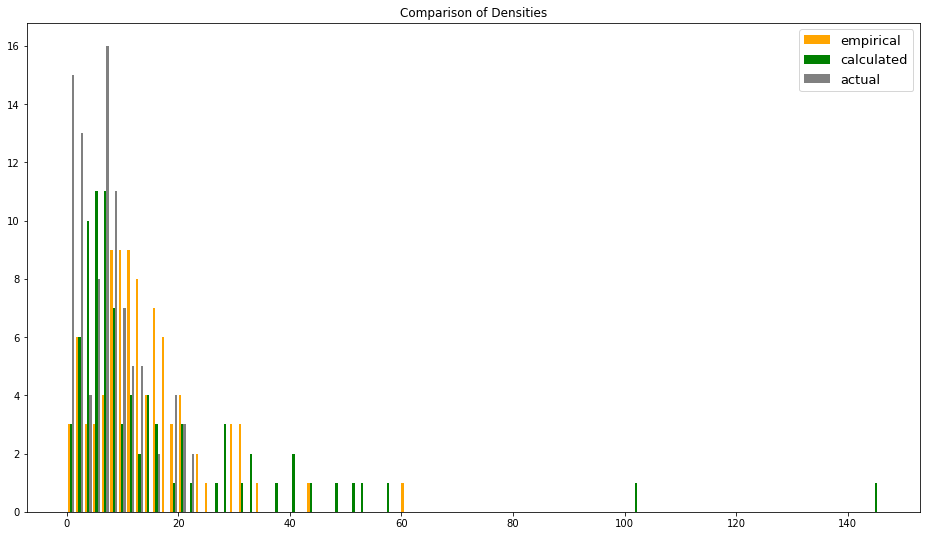

In [10]:
plot.rcParams['figure.figsize'] = [16, 9]
fig, ax = plot.subplots()
types = ['empirical', 'calculated', 'actual']
colors = ['orange', 'green', 'grey']
data = [empirical_densities, calculated_densities, actual_densities]
print([np.average(l) for l in data], [np.max(l) for l in data])
#for i, row in enumerate(data):
    #data[i] = list(zip(range(1, 96), row))    
ax.hist(data, 95, histtype='bar', color=colors, label=types)
#ax.bar(list(range(1,96)), data[0], label='hi')

ax.legend(prop={'size': 13})
ax.set_title('Comparison of Densities')
plot.show()

## Testing density data

$\frac{\text{g} / \text{cm}^3}{\text{g} / \text{mol}} \cdot \text{particles} / \text{mol} = \text{particles} / \text{cm}^3$

Number of atoms given as $10^{21}$ atoms per $\text{cm}^3$

That gives us the constant $6.022 \cdot 10^{23} \cdot 10^{-21} = 6.022 \cdot 10^2 = 602.2$

In [11]:
amount_from_density = lambda p, m: p / m * 602.2
for _, element in elements.items():
    print(element['name'], element['known_count'], end=' ')
    print('approx', amount_from_density(element['known_density'], element['mass']))

hydrogen 0.054 approx 0.05369936305732484
helium 0.027 approx 0.02685570536366094
lithium 46.331 approx 46.32975075637516
beryllium 123.621 approx 123.61823141166037
boron 18.144 approx 130.34390898159282
carbon 49.952 approx 113.66426602945708
nitrogen 0.054 approx 0.053767933917339555
oxygen 0.054 approx 0.05378600447516782
fluorine 0.054 approx 0.053758791686240245
neon 0.027 approx 0.026854699524769945
sodium 25.435 approx 25.43462592274738
magnesium 43.063 approx 43.0620695330179
aluminium 40.04 approx 60.21656734319593
silicon 130.347 approx 49.95051254205908
phosphorus 35.386 approx 35.384918221587625
sulfur 38.82 approx 38.819504132231415
chlorine 0.055 approx 0.054592581727921474
argon 0.027 approx 0.02688855862621408
potassium 13.277 approx 13.276700009974858
calcium 23.14 approx 23.139577823244675
scandium 23.53 approx 40.03869124215259
titanium 57.118 approx 57.11634320095264
vanadium 72.23 approx 72.22877221911409
chromium 82.811 approx 82.80871065329902
manganese 81.555 a

## Calculating distance from density

$1\text{cm}^3$ cube, mass equals density in $\text{g} / \text{cm}^3$

$$m = \rho V = \rho \cdot 1 \text{cm}^3$$

$$\text{mass of one atom} = m_a \cdot N_A^{-1} = \frac{m_a \text{g}/\text{mol}}{6.022 \cdot 10^{-23} \text{mol}^{-1}} \approx m_a \cdot 1.6605 \cdot 10^-24$$

$$\text{number of atoms} = \frac{\text{total mass}}{\text{mass of one atom}} = \frac{\rho}{m_u \cdot N_A^{-1}} = \frac{\rho}{\text m_\text u} \cdot N_A$$

Distance between atoms along wall:

$$\frac{\text{length of wall}}{\sqrt[3]{\text{number of atoms}}} = \frac{1 \text{cm}}{\sqrt[3]{\text{number of atoms}}} = \text{distance} [\text{cm}]$$

Mulitplying by $10^7$ to get the distance in nanometer

In [12]:
distance_from_density = lambda p, m: (p / m * AVOGADRO) ** (-1/3) * 10**7

In [13]:
p = hydrogen['known_density']
print(distance_from_density(p, m))

12.584323449983634


In [31]:
for _, element in elements.items():
    print(element['name'], end=' ')
    p, m = element['known_density'], element['mass'] 
    dist = distance_from_density(p, m)
    print('approx', dist, end=' ')
    # TODO this isn't quite it... spheres and cylinders...
    print('then', density(m, dist / 2 * 10**3), 'vs', p)

hydrogen approx 2.6505965102879236 then 0.00017165815542119416 vs 8.988e-05
helium approx 3.3392926288127884 then 0.00034090988810283896 vs 0.0001785
lithium approx 0.2784282805563834 then 1.0198648753328623 vs 0.534
beryllium approx 0.200742421227587 then 3.533239736640067 vs 1.85
boron approx 0.19722853686082364 then 4.469070802020406 vs 2.34
carbon approx 0.20643912804661876 then 4.329651071871905 vs 2.267
nitrogen approx 2.6494692522862007 then 0.002388470061968685 vs 0.0012506
oxygen approx 2.6491725037756515 then 0.002729188964139814 vs 0.001429
fluorine approx 2.6496194335340513 then 0.003239121401806245 vs 0.001696
neon approx 3.339334319199952 then 0.0017186823994607544 vs 0.0008999
sodium approx 0.34003598672623014 then 1.8544733969067595 vs 0.971
magnesium approx 0.2852999533909837 then 3.3193354931245604 vs 1.738
aluminium approx 0.25512988603640946 then 5.152800437543188 vs 2.698
silicon approx 0.2715313738801669 then 4.449208265122542 vs 2.3296
phosphorus approx 0.3045981